In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [107]:

data = pd.read_csv(r"C:\Users\maddo\Downloads\datasets\dataset123.excel.csv")


print(data.head())
print(data.shape)  


         time_stamp  AmbientConditions.AmbientHumidity.U.Actual  \
0  06-03-2019 10:52                                       17.24   
1  06-03-2019 10:52                                       17.24   
2  06-03-2019 10:52                                       17.24   
3  06-03-2019 10:52                                       17.24   
4  06-03-2019 10:52                                       17.24   

   AmbientConditions.AmbientTemperature.U.Actual  \
0                                          23.53   
1                                          23.53   
2                                          23.53   
3                                          23.53   
4                                          23.53   

   Machine1.RawMaterial.Property1  Machine1.RawMaterial.Property2  \
0                           11.54                             200   
1                           11.54                             200   
2                           11.54                             200   
3       

In [108]:
data.isnull().sum()

time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [109]:
data.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.890000e+00,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,2.730357e-12,1.182333e+00,1.820830e-13,4.145398e-01,3.790436e-13,4.768244e-01,4.361111e-13,2.082948,5.666779e-13
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220000e-95,7.930000e+00,-2.700000e-95,5.650000e+00,-6.200000e-96,1.850000e+00,-1.820000e-95,2.890000e+00,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.890000e+00,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.890000e+00,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.890000e+00,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.890000e+00,14.260000,1.171000e+01


In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# To remove any null values
data = data.drop(columns=['time_stamp'])
data.isnull().sum() 
data = data.dropna()  

# Creating X and y and using them in train-test-split 
X = data.drop(columns=['Stage1.Output.Measurement0.U.Actual','Stage1.Output.Measurement0.U.Setpoint','Stage1.Output.Measurement1.U.Actual','Stage1.Output.Measurement1.U.Setpoint','Stage1.Output.Measurement2.U.Actual','Stage1.Output.Measurement2.U.Setpoint','Stage1.Output.Measurement3.U.Actual','Stage1.Output.Measurement3.U.Setpoint','Stage1.Output.Measurement4.U.Actual','Stage1.Output.Measurement4.U.Setpoint','Stage1.Output.Measurement5.U.Actual','Stage1.Output.Measurement5.U.Setpoint','Stage1.Output.Measurement6.U.Actual','Stage1.Output.Measurement6.U.Setpoint','Stage1.Output.Measurement7.U.Actual','Stage1.Output.Measurement7.U.Setpoint','Stage1.Output.Measurement8.U.Actual','Stage1.Output.Measurement8.U.Setpoint','Stage1.Output.Measurement9.U.Actual','Stage1.Output.Measurement9.U.Setpoint','Stage1.Output.Measurement10.U.Actual','Stage1.Output.Measurement10.U.Setpoint','Stage1.Output.Measurement11.U.Actual','Stage1.Output.Measurement11.U.Setpoint','Stage1.Output.Measurement12.U.Actual','Stage1.Output.Measurement12.U.Setpoint','Stage1.Output.Measurement13.U.Actual','Stage1.Output.Measurement13.U.Setpoint','Stage1.Output.Measurement14.U.Actual','Stage1.Output.Measurement14.U.Setpoint',
'Machine4.Temperature1.C.Actual','Machine4.Temperature2.C.Actual','Machine4.Pressure.C.Actual','Machine4.Temperature3.C.Actual','Machine4.Temperature4.C.Actual','Machine4.Temperature5.C.Actual','Machine4.ExitTemperature.U.Actual','Machine5.Temperature1.C.Actual','Machine5.Temperature2.C.Actual','Machine5.Temperature3.C.Actual','Machine5.Temperature4.C.Actual','Machine5.Temperature5.C.Actual','Machine5.Temperature6.C.Actual','Machine5.ExitTemperature.U.Actual','Stage2.Output.Measurement0.U.Actual','Stage2.Output.Measurement0.U.Setpoint','Stage2.Output.Measurement1.U.Actual','Stage2.Output.Measurement1.U.Setpoint','Stage2.Output.Measurement2.U.Actual','Stage2.Output.Measurement2.U.Setpoint','Stage2.Output.Measurement3.U.Actual','Stage2.Output.Measurement3.U.Setpoint','Stage2.Output.Measurement4.U.Actual','Stage2.Output.Measurement4.U.Setpoint','Stage2.Output.Measurement5.U.Actual','Stage2.Output.Measurement5.U.Setpoint','Stage2.Output.Measurement6.U.Actual','Stage2.Output.Measurement6.U.Setpoint','Stage2.Output.Measurement7.U.Actual','Stage2.Output.Measurement7.U.Setpoint','Stage2.Output.Measurement8.U.Actual','Stage2.Output.Measurement8.U.Setpoint','Stage2.Output.Measurement9.U.Actual','Stage2.Output.Measurement9.U.Setpoint','Stage2.Output.Measurement10.U.Actual','Stage2.Output.Measurement10.U.Setpoint','Stage2.Output.Measurement11.U.Actual','Stage2.Output.Measurement11.U.Setpoint','Stage2.Output.Measurement12.U.Actual','Stage2.Output.Measurement12.U.Setpoint','Stage2.Output.Measurement13.U.Actual','Stage2.Output.Measurement13.U.Setpoint','Stage2.Output.Measurement14.U.Actual','Stage2.Output.Measurement14.U.Setpoint'])
y1 = data['Stage1.Output.Measurement0.U.Actual']
y2 = data['Stage1.Output.Measurement0.U.Setpoint']
y3 = data['Stage1.Output.Measurement1.U.Setpoint']
y4 = data['Stage1.Output.Measurement2.U.Actual']
y5 = data['Stage1.Output.Measurement2.U.Setpoint']

X_train, X_test, y1_train, y1_test,y2_train, y2_test,y3_train, y3_test,y4_train, y4_test,y5_train, y5_test = train_test_split(X, y1,y2,y3,y4,y5, test_size=0.18, random_state=35)


In [111]:
# Now calculating score of 1st model which are for machine 1,2,3
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor() 

#Using multioutput regressor because there are many outputs in the dataset
multioutput_regressor = MultiOutputRegressor(rf_regressor)
y_test_combined = np.column_stack((y1_test, y2_test, y3_test, y4_test, y5_test))
y_train_combined = np.column_stack((y1_train, y2_train, y3_train, y4_train, y5_train))

multioutput_regressor.fit(X_train, y_train_combined)
y_pred_combined = multioutput_regressor.predict(X_test)
y_pred = np.hsplit(y_pred_combined, 5)


In [112]:
multioutput_regressor.score(X_test,y_test_combined)

0.8206402058240103

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate ensemble performance
mse = mean_squared_error(y_test_combined, y_pred_combined)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_combined, y_pred_combined)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.20478466818852392
RMSE: 0.452531400223812
R-squared: 0.8206402058240103


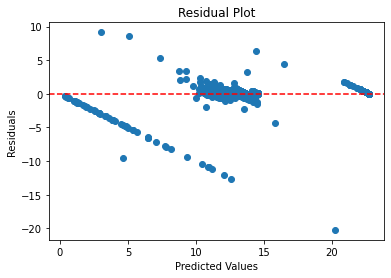

In [114]:
y_test_combined = np.column_stack((y1_test, y2_test, y3_test, y4_test, y5_test))

y_pred_combined = multioutput_regressor.predict(X_test)
y_pred = np.hsplit(y_pred_combined, 5)

residuals = y_test_combined - y_pred_combined
plt.scatter(y_pred_combined, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
#to predict machine 1,2,3 output
num_features = X.shape[1]

new_data = pd.DataFrame(np.random.rand(41,num_features), columns=X.columns)

new_data_scaled = scaler.transform(new_data)

new_data_pred_combined = multioutput_regressor.predict(new_data_scaled)
new_data_pred = np.hsplit(new_data_pred_combined, 5)

# Print the predictions on new data
print("Prediction on New Data:")

for i, y_pred in enumerate(new_data_pred):
    print(f"Prediction for y{i+1}: {y_pred}")

Prediction on New Data:
Prediction for y1: [[7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]
 [7.2016]]
Prediction for y2: [[12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]
 [12.375]]
Prediction for y3: [[21.1482]
 [21.1482]
 [21.1482]
 [21.1482]
 [21.1482]
 [21.1482]
 [21.1482]
 [21.1482]
 [21.1482

C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


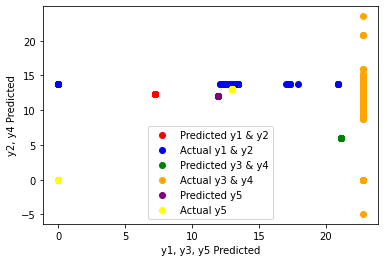

In [158]:
y1_actual = data['Stage1.Output.Measurement0.U.Actual']
y2_actual = data['Stage1.Output.Measurement0.U.Setpoint']
y3_actual = data['Stage1.Output.Measurement1.U.Setpoint']
y4_actual = data['Stage1.Output.Measurement2.U.Actual']
y5_actual = data['Stage1.Output.Measurement2.U.Setpoint']

# Scatter plot of predicted values for y1 and y2
plt.scatter(new_data_pred[0], new_data_pred[1], color='red', label='Predicted y1 & y2')
plt.scatter(y1_actual, y2_actual, color='blue', label='Actual y1 & y2')

# Scatter plot of predicted values for y3 and y4
plt.scatter(new_data_pred[2], new_data_pred[3], color='green', label='Predicted y3 & y4')
plt.scatter(y3_actual, y4_actual, color='orange', label='Actual y3 & y4')

# Scatter plot of predicted values for y5
plt.scatter(new_data_pred[4], new_data_pred[4], color='purple', label='Predicted y5')
plt.scatter(y5_actual, y5_actual, color='yellow', label='Actual y5')

plt.xlabel('y1, y3, y5 Predicted')
plt.ylabel('y2, y4 Predicted')
plt.legend(loc='best')
plt.show()


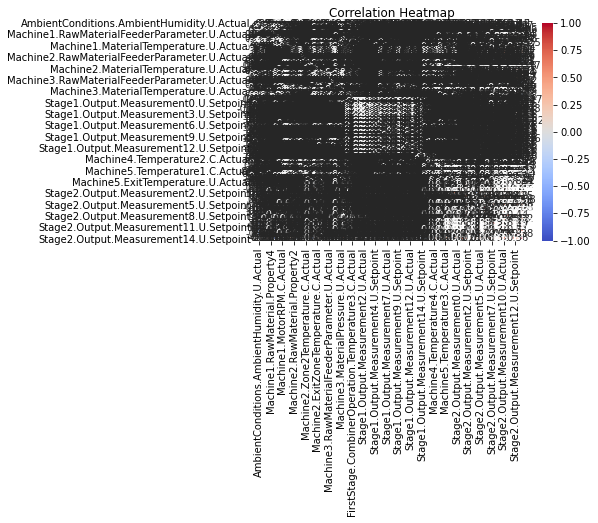

In [117]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [193]:
# This code is for creating X1 and y6,7,8,9,10 (a.k.a for the 2nd model)
X2 = data.drop(columns=['Machine1.RawMaterial.Property1','Machine1.RawMaterial.Property2','Machine1.RawMaterial.Property3','Machine1.RawMaterial.Property4','Machine1.RawMaterialFeederParameter.U.Actual','Machine1.Zone1Temperature.C.Actual','Machine1.Zone2Temperature.C.Actual','Machine1.MotorAmperage.U.Actual','Machine1.MotorRPM.C.Actual','Machine1.MaterialPressure.U.Actual','Machine1.MaterialTemperature.U.Actual','Machine1.ExitZoneTemperature.C.Actual','Machine2.RawMaterial.Property1','Machine2.RawMaterial.Property2','Machine2.RawMaterial.Property3','Machine2.RawMaterial.Property4','Machine2.RawMaterialFeederParameter.U.Actual','Machine2.Zone1Temperature.C.Actual','Machine2.Zone2Temperature.C.Actual','Machine2.MotorAmperage.U.Actual','Machine2.MotorRPM.C.Actual','Machine2.MaterialPressure.U.Actual','Machine2.MaterialTemperature.U.Actual','Machine2.ExitZoneTemperature.C.Actual','Machine3.RawMaterial.Property1','Machine3.RawMaterial.Property2','Machine3.RawMaterial.Property3','Machine3.RawMaterial.Property4','Machine3.RawMaterialFeederParameter.U.Actual','Machine3.Zone1Temperature.C.Actual','Machine3.Zone2Temperature.C.Actual','Machine3.MotorAmperage.U.Actual','Machine3.MotorRPM.C.Actual','Machine3.MaterialPressure.U.Actual','Machine3.MaterialTemperature.U.Actual','Machine3.ExitZoneTemperature.C.Actual','FirstStage.CombinerOperation.Temperature1.U.Actual','FirstStage.CombinerOperation.Temperature2.U.Actual','FirstStage.CombinerOperation.Temperature3.C.Actual','Stage1.Output.Measurement0.U.Actual','Stage1.Output.Measurement0.U.Setpoint','Stage1.Output.Measurement1.U.Actual','Stage1.Output.Measurement1.U.Setpoint','Stage1.Output.Measurement2.U.Actual','Stage1.Output.Measurement2.U.Setpoint','Stage1.Output.Measurement3.U.Actual','Stage1.Output.Measurement3.U.Setpoint','Stage1.Output.Measurement4.U.Actual','Stage1.Output.Measurement4.U.Setpoint','Stage1.Output.Measurement5.U.Actual','Stage1.Output.Measurement5.U.Setpoint','Stage1.Output.Measurement6.U.Actual','Stage1.Output.Measurement6.U.Setpoint','Stage1.Output.Measurement7.U.Actual','Stage1.Output.Measurement7.U.Setpoint','Stage1.Output.Measurement8.U.Actual','Stage1.Output.Measurement8.U.Setpoint','Stage1.Output.Measurement9.U.Actual','Stage1.Output.Measurement9.U.Setpoint','Stage1.Output.Measurement10.U.Actual','Stage1.Output.Measurement10.U.Setpoint','Stage1.Output.Measurement11.U.Actual','Stage1.Output.Measurement11.U.Setpoint','Stage1.Output.Measurement12.U.Actual','Stage1.Output.Measurement12.U.Setpoint','Stage1.Output.Measurement13.U.Actual','Stage1.Output.Measurement13.U.Setpoint','Stage1.Output.Measurement14.U.Actual','Stage1.Output.Measurement14.U.Setpoint','Stage2.Output.Measurement0.U.Actual','Stage2.Output.Measurement0.U.Setpoint','Stage2.Output.Measurement1.U.Actual','Stage2.Output.Measurement1.U.Setpoint','Stage2.Output.Measurement2.U.Actual','Stage2.Output.Measurement2.U.Setpoint','Stage2.Output.Measurement3.U.Actual','Stage2.Output.Measurement3.U.Setpoint','Stage2.Output.Measurement4.U.Actual','Stage2.Output.Measurement4.U.Setpoint','Stage2.Output.Measurement5.U.Actual','Stage2.Output.Measurement5.U.Setpoint','Stage2.Output.Measurement6.U.Actual','Stage2.Output.Measurement6.U.Setpoint','Stage2.Output.Measurement7.U.Actual','Stage2.Output.Measurement7.U.Setpoint','Stage2.Output.Measurement8.U.Actual','Stage2.Output.Measurement8.U.Setpoint','Stage2.Output.Measurement9.U.Actual','Stage2.Output.Measurement9.U.Setpoint','Stage2.Output.Measurement10.U.Actual','Stage2.Output.Measurement10.U.Setpoint','Stage2.Output.Measurement11.U.Actual','Stage2.Output.Measurement11.U.Setpoint','Stage2.Output.Measurement12.U.Actual','Stage2.Output.Measurement12.U.Setpoint','Stage2.Output.Measurement13.U.Actual','Stage2.Output.Measurement13.U.Setpoint','Stage2.Output.Measurement14.U.Actual','Stage2.Output.Measurement14.U.Setpoint'])

data.isnull().sum() 
data = data.dropna()  

y6 = data['Stage2.Output.Measurement0.U.Setpoint']
y7 = data['Stage2.Output.Measurement1.U.Setpoint']
y8 = data['Stage2.Output.Measurement2.U.Setpoint']
y9 = data['Stage2.Output.Measurement3.U.Setpoint']
y10 = data['Stage2.Output.Measurement4.U.Setpoint']

X2_train,X2_test,y6_train,y6_test,y7_train,y7_test ,y8_train,y8_test ,y9_train,y9_test ,y10_train,y10_test,y11_train,y11_test,y12_train,y12_test = train_test_split(X2 , y6,y7,y8,y9,y10,y11,y12 , test_size=0.7,random_state=10)

In [194]:
from sklearn.svm import SVR

svr1 = SVR()
svr2 = SVR()
svr3 = SVR()
svr4 = SVR()
svr5 = SVR()
svr6 = SVR()
svr7 = SVR()

svr1.fit(X1_train, y6_train)
svr2.fit(X1_train, y7_train)
svr3.fit(X1_train, y8_train)
svr4.fit(X1_train, y9_train)
svr5.fit(X1_train, y10_train)
svr6.fit(X1_train, y11_train)
svr7.fit(X1_train, y12_train)

y6_pred = svr1.predict(X1_test)
y7_pred = svr2.predict(X1_test)
y8_pred = svr3.predict(X1_test)
y9_pred = svr4.predict(X1_test)
y10_pred = svr5.predict(X1_test)


In [195]:
# To check the accuracy of 2nd model by using R2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse1 = mean_squared_error(y6_test, y6_pred)
mae1 = mean_absolute_error(y6_test, y6_pred)
r2_1 = r2_score(y6_test, y6_pred)

mse2 = mean_squared_error(y7_test, y7_pred)
mae2 = mean_absolute_error(y7_test, y7_pred)
r2_2 = r2_score(y7_test, y7_pred)

mse3 = mean_squared_error(y8_test, y8_pred)
mae3 = mean_absolute_error(y8_test, y8_pred)
r2_3 = r2_score(y8_test, y8_pred)

mse4 = mean_squared_error(y9_test, y9_pred)
mae4 = mean_absolute_error(y9_test, y9_pred)
r2_4 = r2_score(y9_test, y9_pred)

mse5 = mean_squared_error(y10_test, y10_pred)
mae5 = mean_absolute_error(y10_test, y10_pred)
r2_5 = r2_score(y10_test, y10_pred)

print("Target Variable 1:")
print("Mean Squared Error:", mse1)
print("Mean Absolute Error:", mae1)
print("R-squared Score:", r2_1)
print()

print("Target Variable 2:")
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R-squared Score:", r2_2)
print()

print("Target Variable 3:")
print("Mean Squared Error:", mse3)
print("Mean Absolute Error:", mae3)
print("R-squared Score:", r2_3)
print()

print("Target Variable 4:")
print("Mean Squared Error:", mse4)
print("Mean Absolute Error:", mae4)
print("R-squared Score:", r2_4)
print()

print("Target Variable 5:")
print("Mean Squared Error:", mse5)
print("Mean Absolute Error:", mae5)
print("R-squared Score:", r2_5)
print()

Target Variable 1:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 2:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 3:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 4:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 5:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0



In [196]:
#To create the 2nd model and checking the score(accuracy) 
rf1_regressor = RandomForestRegressor(n_estimators=100) 

multioutput1_regressor = MultiOutputRegressor(rf1_regressor)
y11_test_combined = np.column_stack((y6_test, y7_test, y8_test, y9_test, y10_test))
y11_train_combined = np.column_stack((y6_train, y7_train, y8_train, y9_train, y10_train))


multioutput1_regressor.fit(X1_train,y11_train_combined)
y11_pred_combined = multioutput1_regressor.predict(X1_test)
y11_pred = np.hsplit(y11_pred_combined, y11_pred_combined.shape[1])






In [197]:
multioutput1_regressor.score(X2_test,y11_test_combined)

0.9895291921201694

In [198]:
# This is to check if the model fails and this code is the reason why
array_lengths = [len(X1_train), len(X1_test), len(y6_train), len(y6_test), len(y7_train), len(y7_test), len(y8_train), len(y8_test), len(y9_train), len(y9_test), len(y10_train), len(y10_test)]

if len(set(array_lengths)) != 1:
    print("Found input variables with inconsistent numbers of samples:")
    for i, length in enumerate(array_lengths):
        print(f"Array {i+1}: {length} samples")
else:
    print("Input arrays have consistent numbers of samples.")


Found input variables with inconsistent numbers of samples:
Array 1: 4226 samples
Array 2: 9862 samples
Array 3: 4226 samples
Array 4: 9862 samples
Array 5: 4226 samples
Array 6: 9862 samples
Array 7: 4226 samples
Array 8: 9862 samples
Array 9: 4226 samples
Array 10: 9862 samples
Array 11: 4226 samples
Array 12: 9862 samples


In [200]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2)
#to predict machine 4,5 output
num_features1 = X2.shape[1]
new1_data = pd.DataFrame(np.random.rand(16, num_features1), columns=X2.columns)
new1_data_scaled = scaler.transform(new1_data)
new1_data_pred_combined = multioutput1_regressor.predict(new1_data_scaled)
new1_data_pred = np.array_split(new1_data_pred_combined, 5,axis=1)

# Print the predictions on new data
print("Prediction on New Data:")

for i, y_pred in enumerate(new1_data_pred,start=5):
    print(f"Prediction for y{i+1}: {y_pred}")

Prediction on New Data:
Prediction for y6: [[12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]
 [12.05]]
Prediction for y7: [[11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]
 [11.71]]
Prediction for y8: [[11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]
 [11.]]
Prediction for y9: [[20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]
 [20.73]]
Prediction for y10: [[31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]
 [31.36]]


C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\maddo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


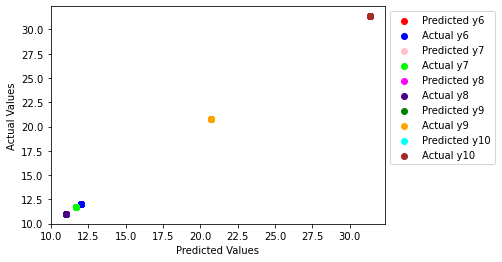

In [203]:
y6_actual = data['Stage2.Output.Measurement0.U.Setpoint']
y7_actual = data['Stage2.Output.Measurement1.U.Setpoint']
y8_actual = data['Stage2.Output.Measurement2.U.Setpoint']
y9_actual = data['Stage2.Output.Measurement3.U.Setpoint']
y10_actual = data['Stage2.Output.Measurement4.U.Setpoint']

# Scatter plot of predicted values for y6
plt.scatter(new1_data_pred[0], new1_data_pred[0], color='red', label='Predicted y6')
plt.scatter(y6_actual, y6_actual, color='blue', label='Actual y6')

plt.scatter(new1_data_pred[1], new1_data_pred[1], color='pink', label='Predicted y7')
plt.scatter(y7_actual, y7_actual, color='lime', label='Actual y7')

plt.scatter(new1_data_pred[2], new1_data_pred[2], color='magenta', label='Predicted y8')
plt.scatter(y8_actual, y8_actual, color='indigo', label='Actual y8')

# Scatter plot of predicted values for y9
plt.scatter(new1_data_pred[3], new1_data_pred[3], color='green', label='Predicted y9')
plt.scatter(y9_actual, y9_actual, color='orange', label='Actual y9')

# Scatter plot of predicted values for y10
plt.scatter(new1_data_pred[4], new1_data_pred[4], color='cyan', label='Predicted y10')
plt.scatter(y10_actual, y10_actual, color='brown', label='Actual y10')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()





In [166]:
num_features1 = X1.shape[1]
print(num_features1)

16
